## Differential Calculus

Differential calculus is the study of how things change. These things
can be drug concentration in the blood, the blood pressure in an
artery, or the number of bacteria in a culture, to list a few physical
examples. Since
we can express the physical quantities in terms of functions, these
problems are similar. We may, in fact, have problems that look identical mathematically, although they vary in their motivation.

* [Wired Crash Course on Derivatives](https://www.wired.com/2015/04/crash-course-derivatives/)

How do you compute the slope of a straight line? Pick two points on the
line $x_1$ and $x_2$ and take the y values at those two points: $y_1$
and $y_2$. The slope of the line, that is how fast $y$ changes with $x$,
is then computed as follows:
$$\frac{\Delta y}{\Delta x}= \frac{y_2-y_1}{x_2-x_1}$$

If we assume the function we are computing the slope for is a function $f(x)$, we can rewrite the slope as 
$$ 
\frac{\Delta y}{\Delta x}= \frac{f(x)-f(x+h)}{h}$$

The derivative is defined as the limit as $h$ approaches zero.

$$
\frac{df}{dx} = \lim_{h\to 0}\frac{f(x)-f(x+h)}{h}
$$

### Ways you might See Derivatives Written
#### Leibniz's Notation

$$
\frac{df}{dx}
$$

#### Lagrange's Notation
$$
f'(x)
$$

#### Euler's Notation
$$
D f(x)
$$

#### Newton's Notation
$$
\dot f(x)
$$

### Higher Order Derivatives

We can of course have derivatives of derivatives and derivatives of derivatives of derivatives and so on. These higher order derivatives would be indicated with the above notation as

$$
\begin{array}{ll}
\frac{d^2f}{dx^2} & \frac{d^nf}{dx^n}\\
f''(x) & f^{(n)}(x)\\
D^2f(x) & D^nf(x)\\
\ddot f(x), & \dddot f(x)\\
\end{array}
$$

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import symbols
from sympy.plotting import plot
from sympy import diff, limit, lambdify

### We Need A Demonstration Function

In [2]:
def function2(x):
    """returns a third-order polynomial in x"""
    return (x-3)**3-5*(x+2)**2+4*x

### Plot `function2` and Compute and Plot the Derivatives with Sympy

#### The Derivatives Have meaning

1. 1st Derivative (slope): how rapidly is the function changing?
1. 2nd Derivative (curvature): are we at a maximum or a minimum (is the function curving down or up)?

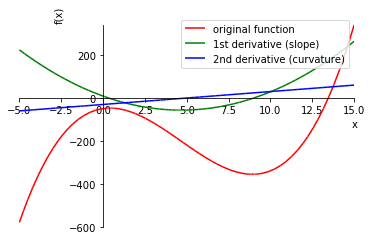

In [3]:
x = symbols('x')

p = plot(function2(x), 
         diff(function2(x)), 
         diff(diff(function2(x))), 
         (x,-5, 15), show=False, legend=True)
p[0].line_color = 'red'
p[0].label = "original function"
p[1].line_color = 'green'
p[1].label = "1st derivative (slope)"
p[2].line_color = "blue"
p[2].label = '2nd derivative (curvature)'
p.show()

## Demonstrate that the derivative is really just a limit

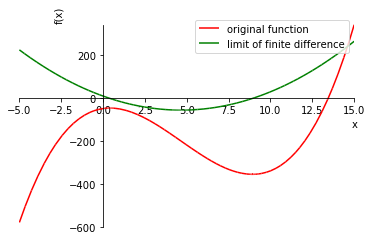

In [4]:
x,h = symbols('x h')

p = plot(function2(x), 
         limit((function2(x+h)-function2(x))/h, h, 0), 
         (x,-5, 15), show=False, legend=True)
p[0].line_color = 'red'
p[0].label = "original function"
p[1].line_color = 'green'
p[1].label = "limit of finite difference"
p.show()

## We can compute higher-order derivatives directly with ``diff``
* Specify the variable to take derivative wrt (with respect to)
* Specify the order of the derivative

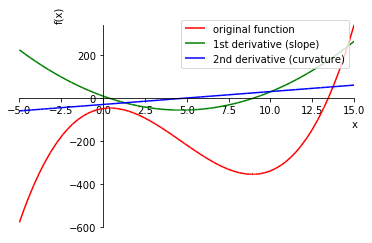

In [5]:
x = symbols('x')

p = plot(function2(x), 
         diff(function2(x), x, 1), 
         diff(function2(x), x, 2), (x,-5, 15), show=False, legend=True)
p[0].line_color = 'red'
p[0].label = "original function"
p[1].line_color = 'green'
p[1].label = "1st derivative (slope)"
p[2].line_color = "blue"
p[2].label = '2nd derivative (curvature)'
p.show()

## Approximate derivative numerically

Using our definition of the derivative, we can compute derivatives numerically

### Using [Matplotlib](http://matplotlib.org/) to plot  data

The most common plotting package in Python is Matplotlib. The simplest plot in matplotlib is a line plot via the [``plot``](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function.

### Create a range of x values

In [6]:
xs = np.arange(-5,15, 0.1)

In [30]:
print(xs)
print(function2(xs))

[ -5.00000000e+00  -4.90000000e+00  -4.80000000e+00  -4.70000000e+00
  -4.60000000e+00  -4.50000000e+00  -4.40000000e+00  -4.30000000e+00
  -4.20000000e+00  -4.10000000e+00  -4.00000000e+00  -3.90000000e+00
  -3.80000000e+00  -3.70000000e+00  -3.60000000e+00  -3.50000000e+00
  -3.40000000e+00  -3.30000000e+00  -3.20000000e+00  -3.10000000e+00
  -3.00000000e+00  -2.90000000e+00  -2.80000000e+00  -2.70000000e+00
  -2.60000000e+00  -2.50000000e+00  -2.40000000e+00  -2.30000000e+00
  -2.20000000e+00  -2.10000000e+00  -2.00000000e+00  -1.90000000e+00
  -1.80000000e+00  -1.70000000e+00  -1.60000000e+00  -1.50000000e+00
  -1.40000000e+00  -1.30000000e+00  -1.20000000e+00  -1.10000000e+00
  -1.00000000e+00  -9.00000000e-01  -8.00000000e-01  -7.00000000e-01
  -6.00000000e-01  -5.00000000e-01  -4.00000000e-01  -3.00000000e-01
  -2.00000000e-01  -1.00000000e-01  -1.77635684e-14   1.00000000e-01
   2.00000000e-01   3.00000000e-01   4.00000000e-01   5.00000000e-01
   6.00000000e-01   7.00000000e-01

### We can use `plot` to just plot an array

In [ ]:
#plot(y)           
#plot y using x as index array 0..N-1

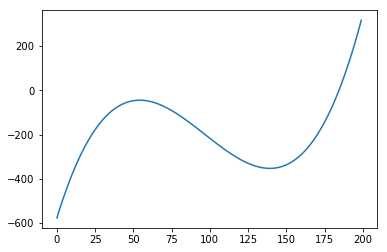

In [7]:
plt.plot(function2(xs))

### Or we can plot one array vs another array

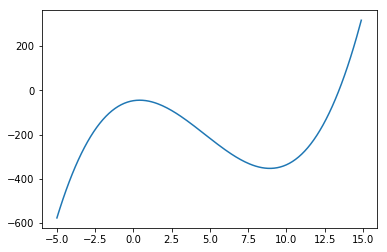

In [9]:
fp2 = lambdify(x, function2(x), "numpy")


plt.plot(xs, function2(xs))

### Exercise: write a function that approximates the 1st derivate of a 1-D numpy array using a forward difference
1. Use a for loop and an empty list (`derivative_v1`)
1. Use a for loop and list comprehension (`derivative_v2`)
2. Use array slicing (`derivative_v3`)

#### Hints

1. What arguments is the function going to need?
1. What needs to be the limits of our for loop?

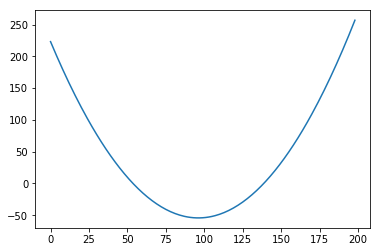

In [13]:
def derivative_v1(x,h=0.1):
    result =[]
    for i in range(0,len(x)-1):
        result.append((x[i+1]-x[i])/h)
    return result
plt.plot(derivative_v1(fp2(xs),0.1))

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
plt.plot(derivative_v2(fp2(xs)))

In [31]:
y = fp2(xs)
#print(y)
#print(y[1:]) 
#print(y[:-1])

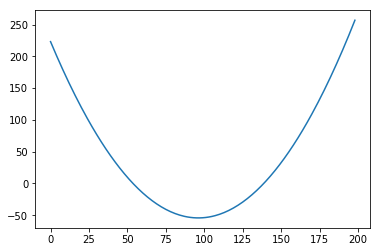

In [32]:
#we want to subtract each element from the next element
#x[1:] gives the "next element" set
#x[:-1], which chops off the last element, gives us the "this element" set

def derivative_v3(x, h=0.1):
    q = (x[1:] - x[:-1])/h 
    return q
plt.plot(derivative_v3(fp2(xs), 0.1))

### What are our speed gains?

In [ ]:
%timeit derivative_v1(fp2(xs))

In [ ]:
%timeit derivative_v2(fp2(xs))

In [ ]:
%timeit derivative_v3(fp2(xs))

## Our plots haven't demonstrated the correct units in `x`

In [ ]:
plt.plot(xs, function2(xs))
plt.plot(xs, derivative_v1(function2(xs)))

### What Went Wrong?

## Exploring line plots with Matplotlib
### Secondary Axis

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches(5,5)

ax1.plot(xs, function2(xs), 'b-')
ax1.set_xlabel('x (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('f(x)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')


ax2 = ax1.twinx()
s2 = derivative_v3(function2(xs))
ax2.plot(xs[1:], s2, 'r')
ax2.set_ylabel('df/dx', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.show()